In [2]:
import seaborn as sns
import pandas as pd
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

<AxesSubplot:xlabel='x', ylabel='y'>

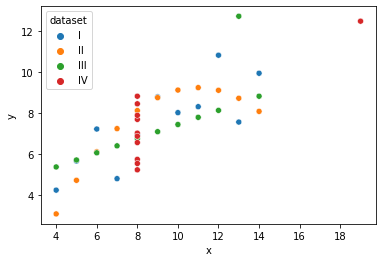

In [7]:
sns.scatterplot(data=anscombe, x='x', y='y', hue='dataset')

In [ ]:
# Back to slides...

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
# One-way frequency
pd.crosstab(index=tips['smoker'], columns='count')

col_0,count
smoker,
Yes,93
No,151


In [15]:
# Two-way frequency
pd.crosstab(index=tips['smoker'], columns=tips['time'])

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


In [16]:
# Two-way frequency, add total
pd.crosstab(index=tips['smoker'], columns=tips['time'], margins=True)

time,Lunch,Dinner,All
smoker,,,
Yes,23,70,93
No,45,106,151
All,68,176,244


In [17]:
# Descriptive stats
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [18]:
# Include all columns...
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [24]:
# All pairwise relationships
sns.pairplot(tips, vars=tips.columns)


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot:xlabel='time', ylabel='tip'>

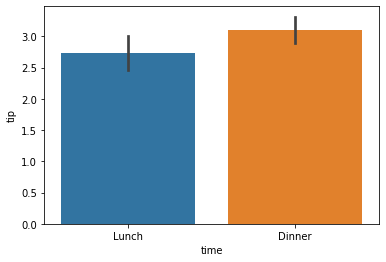

In [28]:
# One more plot type.... 
sns.barplot(data=tips, x='time', y='tip')

# Back to slides

In [39]:
# Baseline -- what is our current data?
tips.groupby('time').describe()['tip']

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0


In [33]:
# Split into lunch and dinner datasets
lunch = tips.query('time == "Lunch"')
lunch.shape

(68, 7)

In [36]:
dinner = tips.query('time == "Dinner"')
dinner.shape

(176, 7)

In [38]:
from scipy import stats
stats.ttest_ind(lunch['tip'], dinner['tip'])

# Back to slides

Ttest_indResult(statistic=-1.9062569301202392, pvalue=0.05780153475171558)

In [40]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


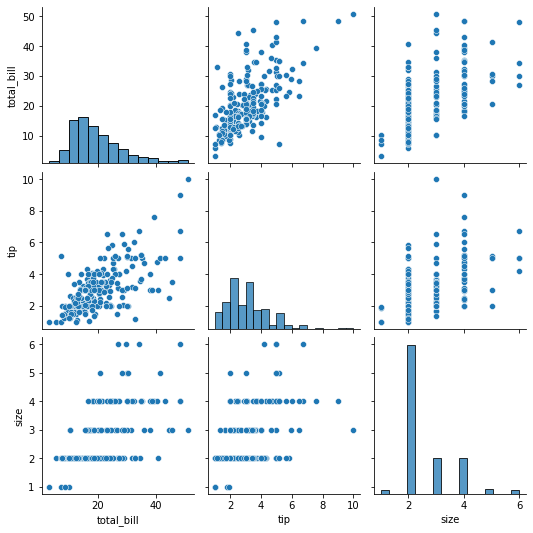

In [42]:
sns.pairplot(data=tips)

<AxesSubplot:>

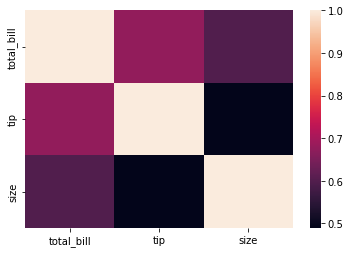

In [45]:
sns.heatmap(tips.corr())
# Back to slides...